# Detection of Parkinson's Disease using Machine Learning Algorithms

## Context of the Project

Parkinson's disease is a brain disorder that causes stiffness, shaking, and difficulty with balance, walking, and coordination. Parkinson's symptoms usually begin gradually and get worse over time. As the disease progresses, people may have difficulty walking and talking. They may also have mental and behavioral changes, sleep problems, depression, memory difficulties, and fatigue. [Reference:https://www.nia.nih.gov/health/parkinsons-disease#:~:text=Parkinson's%20disease%20is%20a%20brain,have%20difficulty%20walking%20and%20talking.]

In this project, we have used the Parkinson's disease dataset obtained from https://www.kaggle.com/wajidsaw/detection-of-parkinson-disease
Using the dataset we have detected Parkinson's disease based on the characteristics/features of the dataset.
We have used 5 different feature selection methods to determine relevant features useful for accurate prediction of the disease.
We have applied various Machine Learning algorithms on dataset to identify Parkinson's disease.
Depending on the performance of algorithms (accuracies of algorithms), we have identified the best feature selction methods and Machine Learning algorithm that results in identifying patients with Parkinson's disease accurately

### Dataset Description

#### 1. MDVP:F0 (Hz) : Average vocal fundamental frequency
#### 2. MDVP:Fhi (Hz) : Maximum vocal fundamental frequency
#### 3. MDVP:Flo (Hz) : Minimum vocal fundamental frequency
#### 4. MDVP:Jitter(%) : Multidimensional Voice Program (MDVP) jitter in percentage
#### 5. MDVP:Jitter(Abs) : Multidimensional Voice Program (MDVP) absolute jitter in ms
#### 6. MDVP:RAP : MDVP relative amplitude perturbation
#### 7. MDVP:PPQ : Multidimensional Voice Program (MDVP) five-point period perturbation quotient
#### 8. Jitter:DDP : Average absolute difference of differences between jitter cycles
#### 9. MDVP:Shimmer : Multidimensional Voice Program (MDVP) local shimmer
#### 10. MDVP:Shimmer(dB) : Multidimensional Voice Program (MDVP) local shimmer in dB
#### 11. Shimmer:APQ3 : Three-point amplitude perturbation quotient
#### 12. Shimmer:APQ5 : Five-point amplitude perturbation quotient
#### 13. MDVP:APQ11	: Multidimensional Voice Program (MDVP) 11-point amplitude perturbation quotient
#### 14. Shimmer:DDA : Average absolute differences between the amplitudes of consecutive periods
#### 15. NHR : Noise-to-harmonics ratio
#### 16. HNR : Harmonics-to-noise ratio
#### 17. RPDE : Recurrence period density entropy measure
#### 18. DFA : Signal fractal scaling exponent of detrended fluctuation analysis
#### 19. Spread1 : Two nonlinear measures of fundamental
#### 20. Spread2 : Frequency variation
#### 21. D2 : Correlation dimension
#### 22. PPE : Pitch period entropy
#### 23. Status: Detection of Parkinson's Disease

### 1. Importing the required libraries

In [107]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

### 2. Data Import: Read the dataset from CSV file

In [3]:
def read_csv_file():
    directory = os.getcwd()
    print("The directory to read the csv files from is: ", directory)
    # Concatenating the absolute file path and file name
    parkinsons_file = os.path.join(os.path.abspath(directory), 'parkinsons.csv')

    if os.path.exists(parkinsons_file):
        parkinsons_dataset = pd.read_csv(parkinsons_file, sep=',')
    else:
        print('File parkinsons.csv does not exists at the location')

    return parkinsons_dataset

parkinsons_data = read_csv_file()

The directory to read the csv files from is:  C:\Users\munge\Data Mining and Knowledge Discovery Project


###  3. Descriptive Statistics 

In [4]:
# Resetting the row index to start from 1
parkinsons_data.index = np.arange(1, len(parkinsons_data) + 1)
# Displaying random sample data from dataframe
parkinsons_data.sample(n = 5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
102,phon_R01_S24_5,128.451,150.449,75.632,0.01551,0.00012,0.00905,0.00909,0.02716,0.06170,...,0.09669,0.11843,15.060,0.639808,0.643327,-4.202730,0.310163,2.638279,0.356881,1
133,phon_R01_S32_5,119.056,125.213,86.795,0.00346,0.00003,0.00169,0.00170,0.00508,0.01201,...,0.01898,0.00903,23.389,0.470972,0.721308,-5.436135,0.254909,2.516320,0.232209,1
28,phon_R01_S06_4,146.845,208.701,81.737,0.00496,0.00003,0.00250,0.00275,0.00749,0.01919,...,0.02650,0.01328,25.119,0.358773,0.726652,-6.271690,0.196102,2.314209,0.162999,1
22,phon_R01_S05_4,153.880,172.860,78.128,0.00480,0.00003,0.00232,0.00267,0.00696,0.04137,...,0.06062,0.01849,19.493,0.629017,0.698951,-5.186960,0.237622,2.557536,0.259765,1
54,phon_R01_S13_6,129.336,139.867,118.604,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,...,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491,0


In [5]:
# Check shape of the dataset
parkinsons_data.shape

(195, 24)

In [6]:
# Checking the concise summary of the dataframe
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 195
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# Checking statistics of dataset
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


#### Observation: 
#### 1. All the attributes except name and status are of float64 data type. The name attribute is of object and status attribute is of int64 data type
#### 2. The statistics of all the columns i.e. mean, minimum, maximum, percentiles, count and standard deviation are described in the table

### 4. Data Cleaning / Data Preprocessing 

In [8]:
# Checking if any values for columns are NULL
parkinsons_data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

#### Observation: 
#### There are no null values in any columns hence data cleaning process is completed

###  5. Visualization of Descriptive Statistics

###  5.1 Histogram of all the columns of dataset

Text(0.5, 1.0, 'Histogram Visualization of columns')

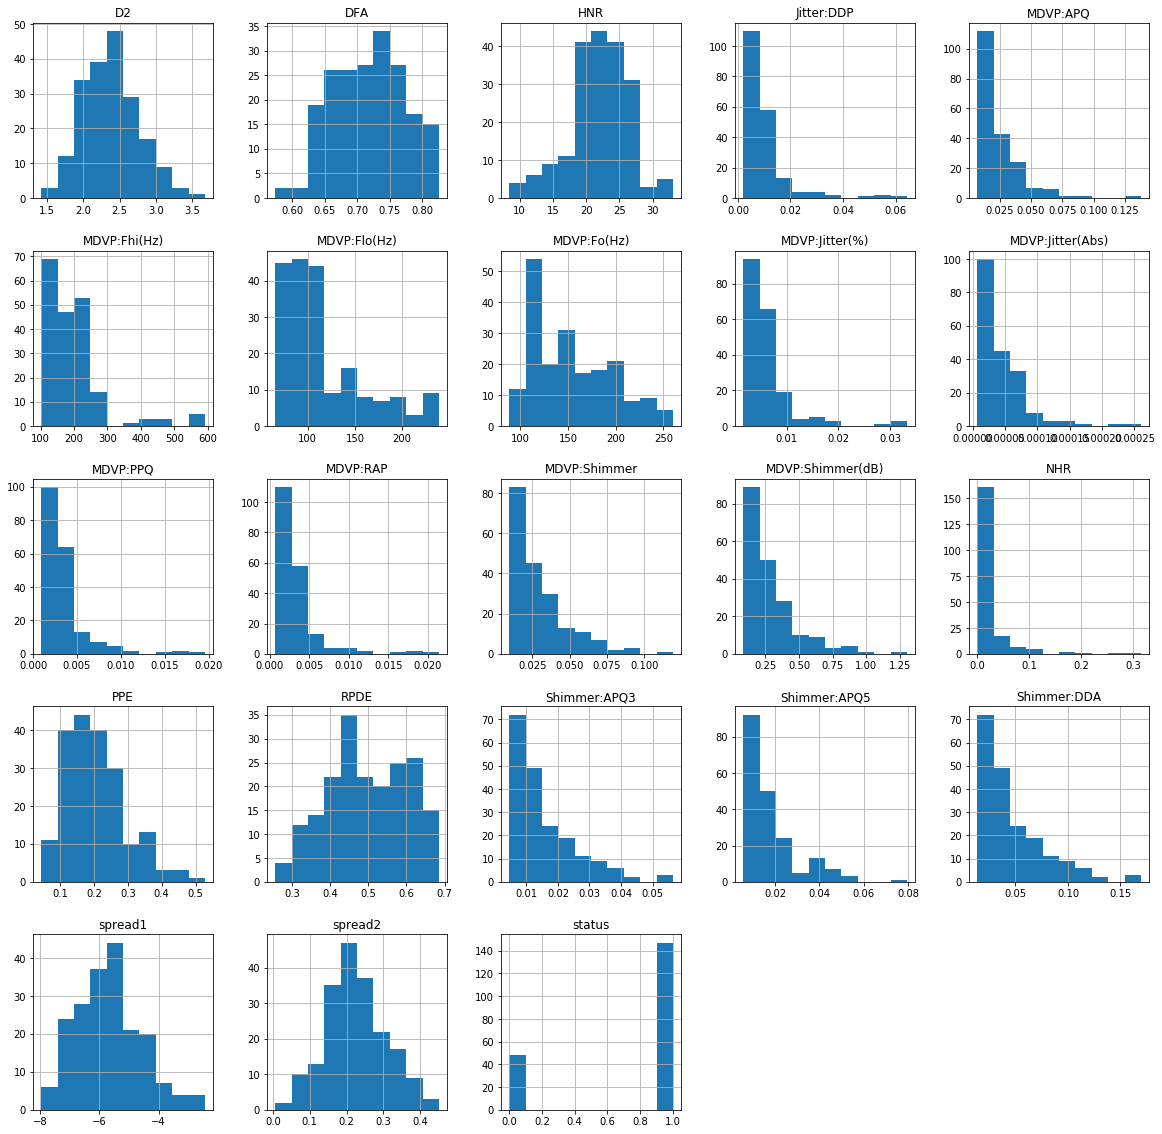

In [9]:
parkinsons_data.hist(column=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)',
                              'MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3',
                              'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2',
                              'D2','PPE','status'], figsize=(20,20)) 
plt.title('Histogram Visualization of columns')

#### Observations:
#### D2 values have high distribution in between values 2 to 2.5
#### DFA values have high distribution in between values 0.65 to 0.80
#### HNR values are concentrates in rnage of around 18 to 28
#### Jitter DDP have values highly concentrated from 0 to 0.02 while low concentration from 0.02 to 0.06
#### MDVP: APQ have high decreasing number of observation from 0 to 0.100
#### MDVP: Fhi(Hz) have low concentration between 300 to 400 and high values between 100 to 300
#### MDVP: Flo(Hz) the concentration of values is more in between 0 to around 120 while after the range the values are decresing with unequal patterns
#### MDVP: Fo(Hz) values seem to be no evenly distrubted across the range from 100 to 250
#### MDVP: Jitter(%) have high concentration between 0 to 0.01 and lowest from 0.025 to 0.03
#### MDVP: Jitter(Abs) have highest value as 100
#### MDVP: PPQ, MDVP: RAP, MDVP: Shimmer, MDVP: Shimmer(dB), NHR, Shimmer: APQ5, Shimmer: DDA seem to have decresing pattern from start values to end values
#### PPE, RPDE, sperad1, spread2 shows similar to bell curve structure 
#### Status has around 45 values as 0 and more than 140 values as 1

### 5.2 Two Scatterplots of columns of dataset

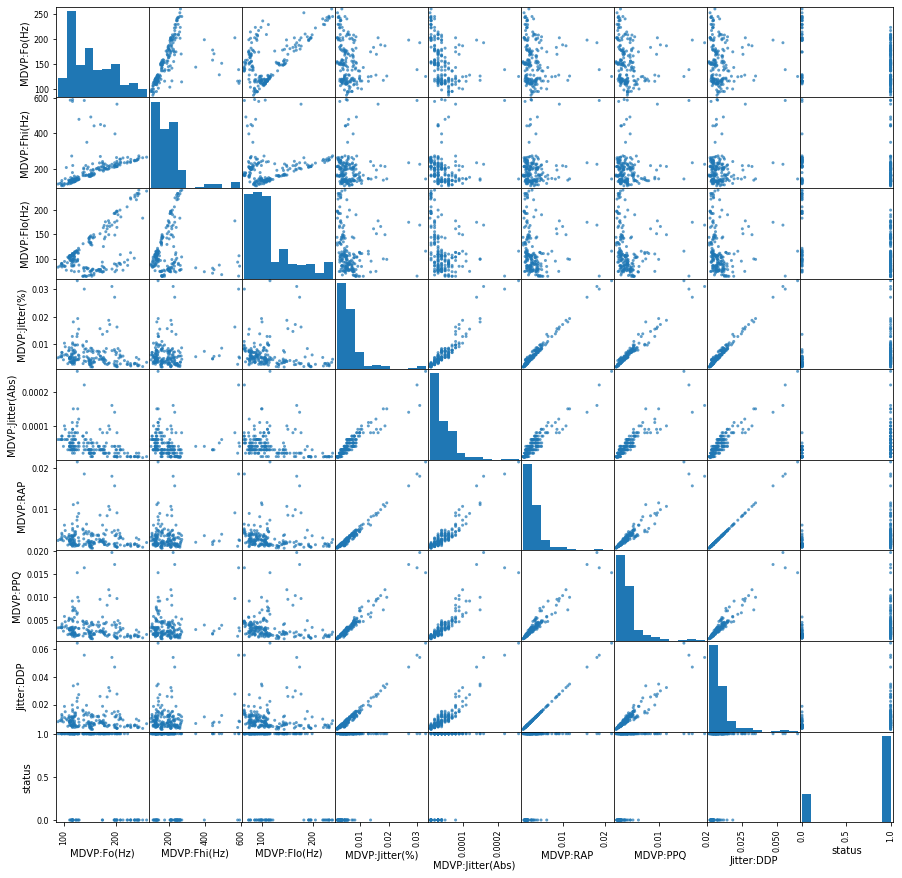

In [10]:
# Plotting the scatterplot for columns to display distribution of data
parkinsons_scatter_matrix1 = parkinsons_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)',
                              'MDVP:RAP','MDVP:PPQ','Jitter:DDP','status']]
scatter_matrix(parkinsons_scatter_matrix1, alpha=0.7, figsize=(15,15))
plt.show()

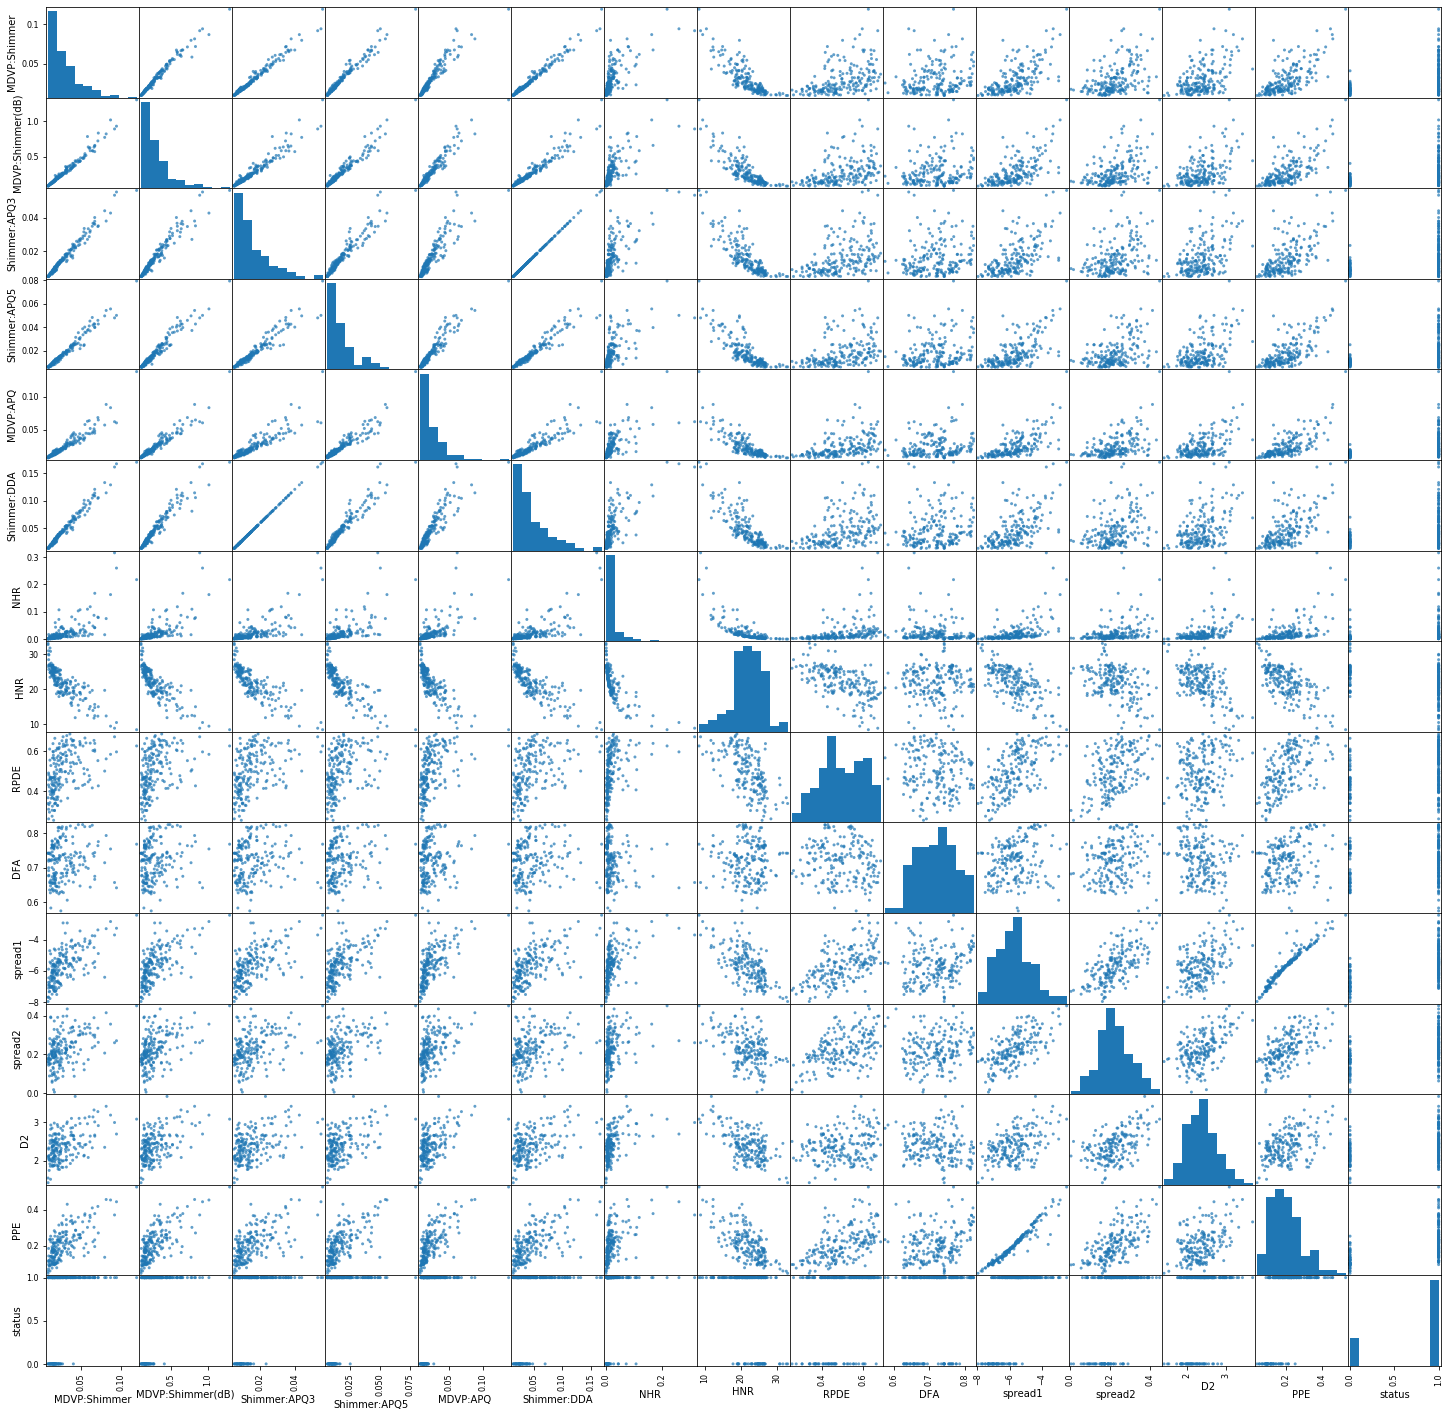

In [13]:
# Plotting the scatterplot for columns to display distribution of data
parkinsons_scatter_matrix2 = parkinsons_data[['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3',
                              'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2',
                              'D2','PPE','status']]
scatter_matrix(parkinsons_scatter_matrix2, alpha=0.7, figsize=(25,25))
plt.show()

#### Observations:
#### Stong positive correlation can be seen among columns 'MDVP:Shimmer(dB)', 'NHR', 'PPE', 'Jitter:DDP', 'Shimmer:DDA', 'MDVP:APQ', 'MDVP:RAP',  'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:PPQ' and 'MDVP:Jitter(Abs)'. While other columns show relatively weak correlation

###  6. Splitting the data columns into features and result

In [14]:
# Seperating Features from Result
feature_candidates = parkinsons_data.drop(['name','status'], axis=1)
parkinson_result = pd.DataFrame(parkinsons_data['status'])
print('Feature Candidates :')
(feature_candidates)

Feature Candidates :


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
192,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
193,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
194,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [15]:
print('Result/ Outcome column :')
(parkinson_result)

Result/ Outcome column :


,status
1,1
2,1
3,1
4,1
5,1
...,...
191,0
192,0
193,0
194,0


###  7. Feature Selection using various methods

### 7.1 Feature Selection using Correlation Coefficient
#### In order to achieve better accuracy, we have selected relevant features from the dataset using Correlation Coefficient
#### We have identified the features which are highly correlated among themselves and then dropped them as they will not provide accurate predictions
#### Considering the remaining features, we found correlation of those with status column and generated training and testing datasets

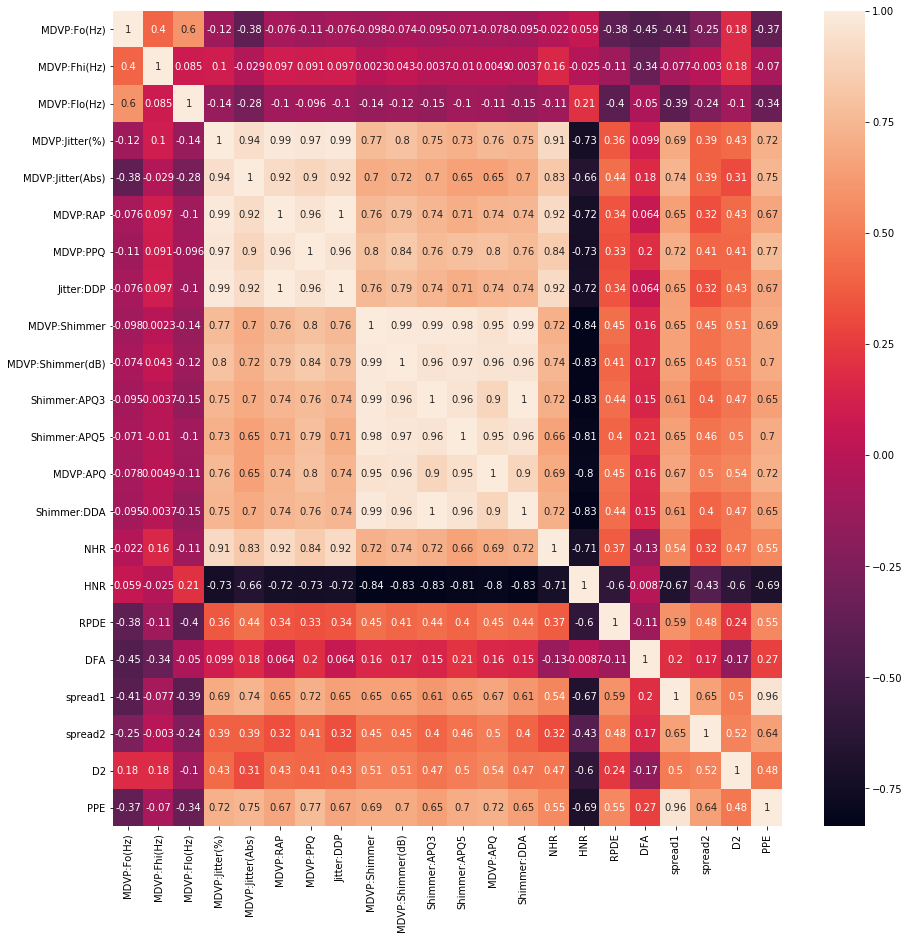

In [16]:
# Computing Correlation Matrix on feature candidates and displaying result
feature_candidate_correlation_matrix = feature_candidates.corr()
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(feature_candidate_correlation_matrix, annot=True, ax=ax)

In [17]:
# Selecting highly correlated features : 
# In order to accurately identify parkinson's disease, we have first determined features those are highly correlated among 
# themselves.
# If a feature is highly correlated with any other feature, then they can not be used for predicting accurate result
def correlation_filteration(dataset, threshold):
    correlation_columns = set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if (correlation_matrix.iloc[i,j]) > threshold: 
                column_name = correlation_matrix.columns[i]
                correlation_columns.add(column_name)
    return correlation_columns 

highly_correlated_features = correlation_filteration(feature_candidates,0.9)
print('The features which are highly correlated are: ', highly_correlated_features)

The features which are highly correlated are:  {'MDVP:PPQ', 'MDVP:APQ', 'Shimmer:APQ5', 'MDVP:RAP', 'MDVP:Shimmer(dB)', 'Shimmer:DDA', 'PPE', 'Jitter:DDP', 'MDVP:Jitter(Abs)', 'NHR', 'Shimmer:APQ3'}


#### Observation: As the features 'MDVP:Shimmer(dB)', 'NHR', 'PPE', 'Jitter:DDP', 'Shimmer:DDA', 'MDVP:APQ', 'MDVP:RAP', 
#### 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:PPQ', 'MDVP:Jitter(Abs)' are highly correlated among themselves, we will drop them
#### and will use remaining features

In [18]:
# Selected highly correlated features and result column into a dataframe to check their correlation
parkinsons_Correlation_Coefficient_data = feature_candidates.drop(highly_correlated_features, axis=1)
parkinsons_Correlation_Coefficient_data['status'] = parkinson_result
parkinsons_Correlation_Coefficient_data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2,status
1,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,1
2,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,1
3,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,1
4,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,1
5,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,1
...,...,...,...,...,...,...,...,...,...,...,...,...
191,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0
192,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0
193,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0
194,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0


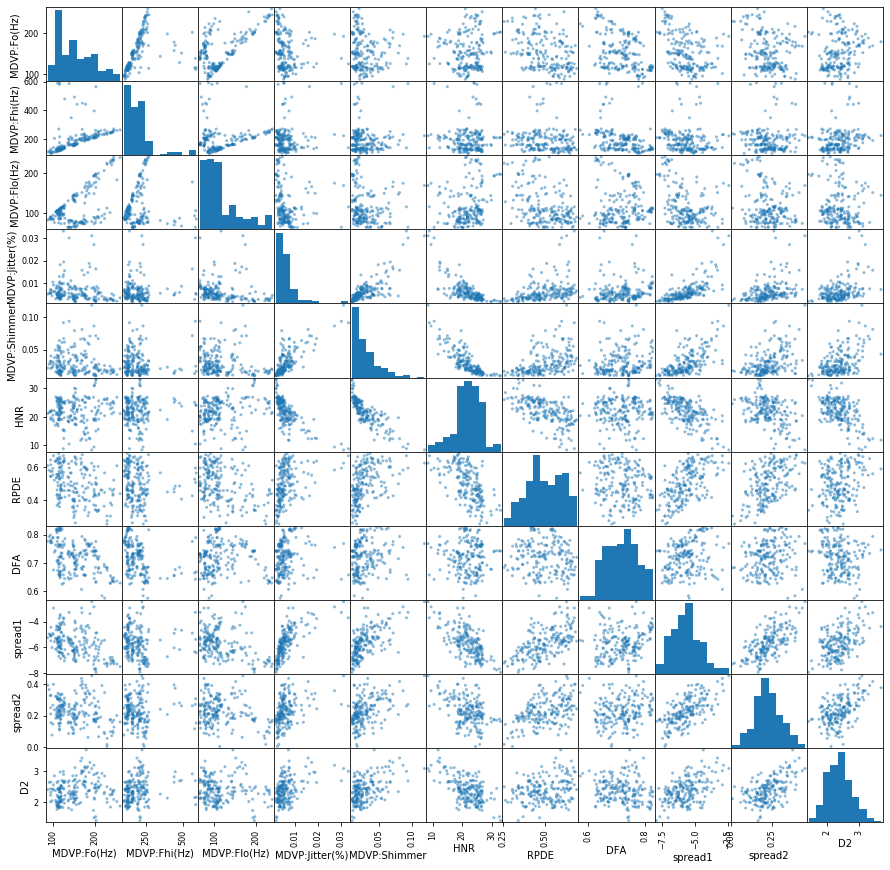

In [19]:
# Plotting the scatterplot for columns to display distribution of data
parkinsons_scatter_matrix = parkinsons_Correlation_Coefficient_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Shimmer','HNR','RPDE','DFA','spread1','spread2','D2']]
scatter_matrix(parkinsons_scatter_matrix, alpha=0.5, figsize=(15,15))
plt.show()

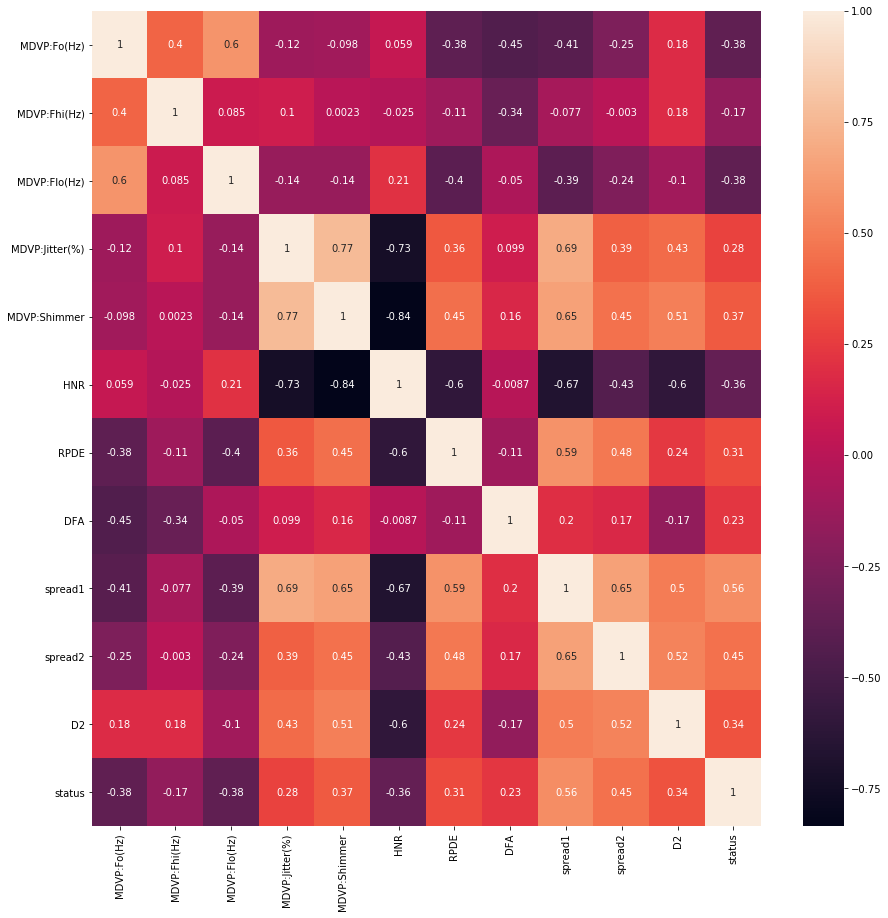

In [20]:
# We have to display how selected features are correlated with respect to the status column
# Computing Correlation Matrix on selected features and status
correlation_matrix = parkinsons_Correlation_Coefficient_data.corr()
correlation_matrix.abs().sort_values(by='status',ascending=False)
fig, ax = plt.subplots(figsize=(15,15))  
sb.heatmap(correlation_matrix, annot=True, ax=ax)

In [21]:
# Training dataset
parkinsons_Correlation_Coefficient_training = parkinsons_Correlation_Coefficient_data[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Shimmer','HNR','RPDE','DFA','spread1','spread2','D2']]
parkinsons_Correlation_Coefficient_training 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,HNR,RPDE,DFA,spread1,spread2,D2
1,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442
2,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855
3,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259
4,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554
5,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...
191,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476
192,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312
193,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772
194,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608


### 7.2 Feature Selection using Information Gain
#### Information Gain of each variable in context of target variable is used which calculates reduction in entrophy from the transformation of a dataset.

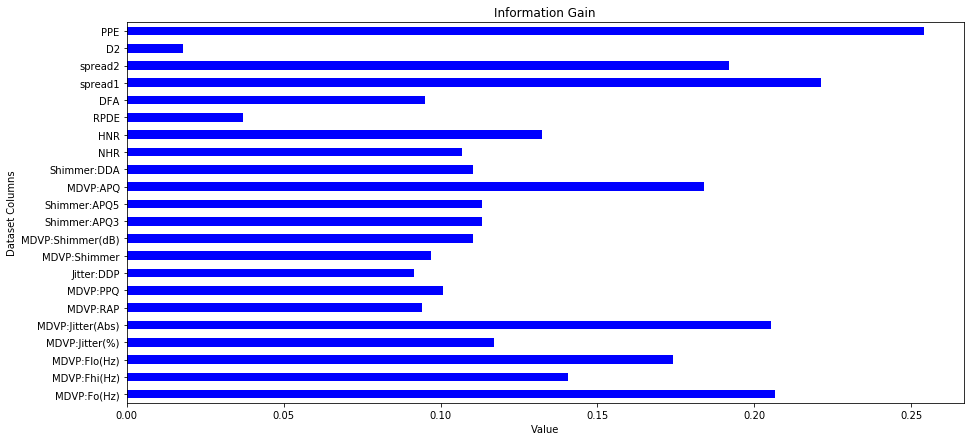

In [22]:
information_gain = mutual_info_classif(feature_candidates, parkinson_result)
feature_information_gain = pd.Series(information_gain, parkinsons_data.columns[1:len(parkinsons_data.columns)-1])
feature_information_gain.plot(kind='barh', color='blue', figsize=(15,7))
plt.xlabel('Value')
plt.ylabel('Dataset Columns')
plt.title('Information Gain')
plt.show()

In [24]:
feature_information_gain

MDVP:Fo(Hz)         0.206593
MDVP:Fhi(Hz)        0.140713
MDVP:Flo(Hz)        0.174088
MDVP:Jitter(%)      0.117083
MDVP:Jitter(Abs)    0.205426
MDVP:RAP            0.094236
MDVP:PPQ            0.100808
Jitter:DDP          0.091604
MDVP:Shimmer        0.096833
MDVP:Shimmer(dB)    0.110458
Shimmer:APQ3        0.113049
Shimmer:APQ5        0.113051
MDVP:APQ            0.183975
Shimmer:DDA         0.110436
NHR                 0.106722
HNR                 0.132462
RPDE                0.037003
DFA                 0.095116
spread1             0.221368
spread2             0.192002
D2                  0.017913
PPE                 0.253982
dtype: float64

#### Based on the graph, choosing columns greater than 0.10 as features :
#### MDVP: Fo(HZ), MDVP: Fhi(HZ), MDVP: Flo(HZ), MDVP: Jitter(%), MDVP: Jitter(Abs), MDVP:Shimmer, MDVP:Shimmer(dB), 
#### Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, spread1, spread2, D2, PPE

In [25]:
# Splitting the dataset for training based on selected features 
parkinsons_information_gain_training = feature_candidates[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)',
                                                            'MDVP:Jitter(Abs)','MDVP:Shimmer','MDVP:Shimmer(dB)',
                                                            'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ','Shimmer:DDA',
                                                            'NHR','HNR','spread1','spread2','D2','PPE']]
parkinsons_information_gain_training

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,spread1,spread2,D2,PPE
1,119.992,157.302,74.997,0.00784,0.00007,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,-4.813031,0.266482,2.301442,0.284654
2,122.400,148.650,113.819,0.00968,0.00008,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,-4.075192,0.335590,2.486855,0.368674
3,116.682,131.111,111.555,0.01050,0.00009,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,-4.443179,0.311173,2.342259,0.332634
4,116.676,137.871,111.366,0.00997,0.00009,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,-4.117501,0.334147,2.405554,0.368975
5,116.014,141.781,110.655,0.01284,0.00011,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,174.188,230.978,94.261,0.00459,0.00003,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,-6.538586,0.121952,2.657476,0.133050
192,209.516,253.017,89.488,0.00564,0.00003,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,-6.195325,0.129303,2.784312,0.168895
193,174.688,240.005,74.287,0.01360,0.00008,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,-6.787197,0.158453,2.679772,0.131728
194,198.764,396.961,74.904,0.00740,0.00004,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,-6.744577,0.207454,2.138608,0.123306


### 7.3 Feature Selection using Sequential Forward Feature Selection
#### It chooses best performing variable against target. The next step is to select another variable that gives best performance in addition to first selected variable.
#### The process continues until present criteria is achieved.

In [26]:
# Calling Linear Regression model
linear_regression = LinearRegression()
# Building Feature Selection Model
# k_feares : Best number of features to be selected
# verbose : prints model summary at each iteration
# scoring : scoring based on mean squared error metric
forward_feature_selection = sfs(linear_regression, k_features=11, forward=True, verbose=2, scoring='neg_mean_squared_error')
# Training the model to select features
forward_feature_selection = forward_feature_selection.fit(feature_candidates, parkinson_result)
# Getting the list of features
forward_features = list(forward_feature_selection.k_feature_names_)
print(forward_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2021-05-13 15:30:21] Features: 1/11 -- score: -0.1597272474331936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2021-05-13 15:30:21] Features: 2/11 -- score: -0.15162324962632773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished

[2021-05-13 15:30:22] Features: 3/11 -- score: -0.1507937062948231[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'NHR', 'HNR', 'RPDE', 'spread1', 'spread2', 'D2']


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2021-05-13 15:30:23] Features: 11/11 -- score: -0.14382872046268386

#### Based on the evaluation, the best 11 selected features are: (Some of them are different than foward feature selection)
#### MDVP:Fo(Hz), MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP, NHR, HNR, RPDE, spread1, spread2, D2

In [27]:
# Splitting the dataset for training based on selected features 
parkinsons_forward_feature_selection_training = feature_candidates[['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 
                                                           'Jitter:DDP', 'NHR', 'HNR', 'RPDE', 'spread1', 'spread2', 'D2']]
parkinsons_forward_feature_selection_training

,MDVP:Fo(Hz),MDVP:Jitter(%),MDVP:RAP,MDVP:PPQ,Jitter:DDP,NHR,HNR,RPDE,spread1,spread2,D2
1,119.992,0.00784,0.00370,0.00554,0.01109,0.02211,21.033,0.414783,-4.813031,0.266482,2.301442
2,122.400,0.00968,0.00465,0.00696,0.01394,0.01929,19.085,0.458359,-4.075192,0.335590,2.486855
3,116.682,0.01050,0.00544,0.00781,0.01633,0.01309,20.651,0.429895,-4.443179,0.311173,2.342259
4,116.676,0.00997,0.00502,0.00698,0.01505,0.01353,20.644,0.434969,-4.117501,0.334147,2.405554
5,116.014,0.01284,0.00655,0.00908,0.01966,0.01767,19.649,0.417356,-3.747787,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...,...,...
191,174.188,0.00459,0.00263,0.00259,0.00790,0.02764,19.517,0.448439,-6.538586,0.121952,2.657476
192,209.516,0.00564,0.00331,0.00292,0.00994,0.01810,19.147,0.431674,-6.195325,0.129303,2.784312
193,174.688,0.01360,0.00624,0.00564,0.01873,0.10715,17.883,0.407567,-6.787197,0.158453,2.679772
194,198.764,0.00740,0.00370,0.00390,0.01109,0.07223,19.020,0.451221,-6.744577,0.207454,2.138608


### 7.4 Feature Selection using Backward Elimination Feature Selection

#### All the independent variables are used at first and insignificant feature with the highest p value (>significance level)
#### are removed. The process repeats until we have significant features.

In [28]:
# Calling Linear Regression model
linear_regression = LinearRegression()
# Building Feature Selection Model
# k_feares : Best number of features to be selected
# verbose : prints model summary at each iteration
# scoring : scoring based on mean squared error metric
backward_feature_selection = sfs(linear_regression, k_features=11, forward=False, verbose=2, scoring='neg_mean_squared_error')
# Training the model to select features
backward_feature_selection = backward_feature_selection.fit(feature_candidates, parkinson_result)
# Getting the list of features
backward_features = list(backward_feature_selection.k_feature_names_)
print(backward_features)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2021-05-13 15:30:38] Features: 21/11 -- score: -0.18978600855250433[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2021-05-13 15:30:38] Features: 20/11 -- score: -0.18008186445960234[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished

[2021-05-13 15:30:39] Features: 19/11 -- score: -0.17129053676757927[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)

['MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'NHR', 'RPDE', 'DFA', 'spread1', 'spread2', 'PPE']


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2021-05-13 15:30:40] Features: 11/11 -- score: -0.14568401765074163

#### Based on the evaluation, the best 11 selected features are:
#### MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:RAP, Jitter:DDP, MDVP:Shimmer(dB), NHR, RPDE, DFA, spread1, spread2, PPE

In [30]:
# Splitting the dataset for training based on selected features 
parkinsons_backward_feature_selection_training = feature_candidates[['MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'NHR', 'RPDE', 'DFA', 'spread1', 'spread2', 'PPE']]
parkinsons_backward_feature_selection_training

,MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:RAP,Jitter:DDP,MDVP:Shimmer(dB),NHR,RPDE,DFA,spread1,spread2,PPE
1,74.997,0.00784,0.00370,0.01109,0.426,0.02211,0.414783,0.815285,-4.813031,0.266482,0.284654
2,113.819,0.00968,0.00465,0.01394,0.626,0.01929,0.458359,0.819521,-4.075192,0.335590,0.368674
3,111.555,0.01050,0.00544,0.01633,0.482,0.01309,0.429895,0.825288,-4.443179,0.311173,0.332634
4,111.366,0.00997,0.00502,0.01505,0.517,0.01353,0.434969,0.819235,-4.117501,0.334147,0.368975
5,110.655,0.01284,0.00655,0.01966,0.584,0.01767,0.417356,0.823484,-3.747787,0.234513,0.410335
...,...,...,...,...,...,...,...,...,...,...,...
191,94.261,0.00459,0.00263,0.00790,0.405,0.02764,0.448439,0.657899,-6.538586,0.121952,0.133050
192,89.488,0.00564,0.00331,0.00994,0.263,0.01810,0.431674,0.683244,-6.195325,0.129303,0.168895
193,74.287,0.01360,0.00624,0.01873,0.256,0.10715,0.407567,0.655683,-6.787197,0.158453,0.131728
194,74.904,0.00740,0.00370,0.01109,0.241,0.07223,0.451221,0.643956,-6.744577,0.207454,0.123306


### 7.5 Feature Selection using Embedded Method
#### Iterative method in which in each iteration, features those contribute the most to the training are extracted
#### We have used Lasso regularization. Lasso Regression penalizes coefficient for irrelavant features by making them 0. These features are removed and other features are considered

In [31]:
# Lasso Regression model
regression = LassoCV()
regression.fit(feature_candidates,parkinson_result)
print('The Best Alpha using built-in LassoCV : %f' % regression.alpha_)
print('Best Score using built-in LassoCV : %f' % regression.score(feature_candidates,parkinson_result))
coefficient = pd.Series(regression.coef_, index = feature_candidates.columns)

The Best Alpha using built-in LassoCV : 0.007110
Best Score using built-in LassoCV : 0.385693


In [32]:
print("Lasso considered " + str(sum(coefficient != 0)) + " variables and eliminated the other " +  str(sum(coefficient == 0)) + " variables")

Lasso considered 5 variables and eliminated the other 17 variables


Text(0.5, 1.0, 'Importance of Features using Lasso Models')

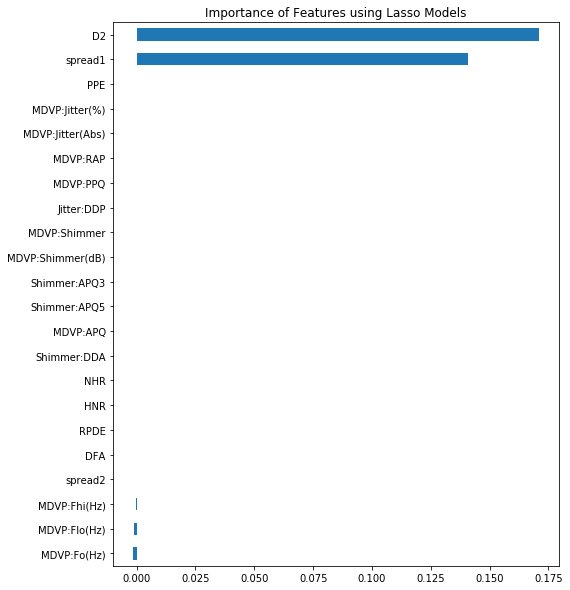

In [33]:
important_coefficients = coefficient.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coefficients.plot(kind = "barh")
plt.title("Importance of Features using Lasso Models")

#### Based on the evaluation, the best 5 selected features are:
#### MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), spread1, D2

In [34]:
# Splitting the dataset for training based on selected features 
parkinsons_lasso_training = feature_candidates[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'spread1', 'D2']]
parkinsons_lasso_training

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),spread1,D2
1,119.992,157.302,74.997,-4.813031,2.301442
2,122.400,148.650,113.819,-4.075192,2.486855
3,116.682,131.111,111.555,-4.443179,2.342259
4,116.676,137.871,111.366,-4.117501,2.405554
5,116.014,141.781,110.655,-3.747787,2.332180
...,...,...,...,...,...
191,174.188,230.978,94.261,-6.538586,2.657476
192,209.516,253.017,89.488,-6.195325,2.784312
193,174.688,240.005,74.287,-6.787197,2.679772
194,198.764,396.961,74.904,-6.744577,2.138608


###  7. Generation of training and Testing Datasets

In [35]:
# Splitting the dataset into traing and testing 
def TrainingTestingSet(input_data, output_data, train_size, test_size, seed):
    X_train, X_test, Y_train, Y_test = train_test_split(input_data, output_data, train_size=train_size ,test_size=test_size, random_state=seed)
    return X_train, X_test, Y_train, Y_test

train_size = 0.80
test_size = 0.20
seed = 5

X_train_corr_coeff, X_test_corr_coeff, Y_train_corr_coeff, Y_test_corr_coeff = TrainingTestingSet(parkinsons_Correlation_Coefficient_training, parkinson_result, train_size, test_size, seed)
X_train_info_gain, X_test_info_gain, Y_train_info_gain, Y_test_info_gain = TrainingTestingSet(parkinsons_information_gain_training, parkinson_result, train_size, test_size, seed)
X_train_forward, X_test_forward, Y_train_forward, Y_test_forward = TrainingTestingSet(parkinsons_forward_feature_selection_training, parkinson_result, train_size, test_size, seed)
X_train_backward, X_test_backward, Y_train_backward, Y_test_backward = TrainingTestingSet(parkinsons_backward_feature_selection_training, parkinson_result, train_size, test_size, seed)
X_train_lasso, X_test_lasso, Y_train_lasso, Y_test_lasso = TrainingTestingSet(parkinsons_lasso_training, parkinson_result, train_size, test_size, seed)

###  8. Implementation of various algorithms on Parkinson's data models based on various Feature Selection Methods

### 8.1 Implementation of various algorithms without Feature Scaling

In [36]:
# Algorithm implmentation 
def algorithmImplementation(X_train, Y_train, n_neighbors):
    # Model List for all Models
    parkinson_models = []
    parkinson_models.append(('Logistic Regression', LogisticRegression()))
    parkinson_models.append(('Support Vector Machine', SVC()))    
    parkinson_models.append(("Decision Tree", DecisionTreeClassifier()))
    parkinson_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=n_neighbors)))
    parkinson_models.append(('Naive Bayes', GaussianNB()))

    # Evaluating Each model
    columns = []
    predictions = []
    for column, parkinson_model in parkinson_models:
        fold = KFold(n_splits=10, random_state=0)
        outcome = cross_val_score(parkinson_model, X_train, Y_train, cv=fold, scoring='accuracy')
        predictions.append(outcome)
        columns.append(column)
        result = "%s : %f (%f)"%(column, outcome.mean(), outcome.std())
        print(result)

    # Visualizing the Model accuracy
    fig=plt.figure()
    fig.suptitle("Algorithmic Accuracy Comparisons")
    plt.boxplot(predictions)
    plt.show()

### 8.1.1 Algorithm implmentation using Correlation Coefficient feature selection

Accuracies of Algorithms using Correlation Coefficients
Logistic Regression : 0.871667 (0.108202)
Support Vector Machine : 0.795417 (0.108164)
Decision Tree : 0.867083 (0.098027)
K Nearest Neighbor : 0.821667 (0.100031)
Naive Bayes : 0.750000 (0.091439)


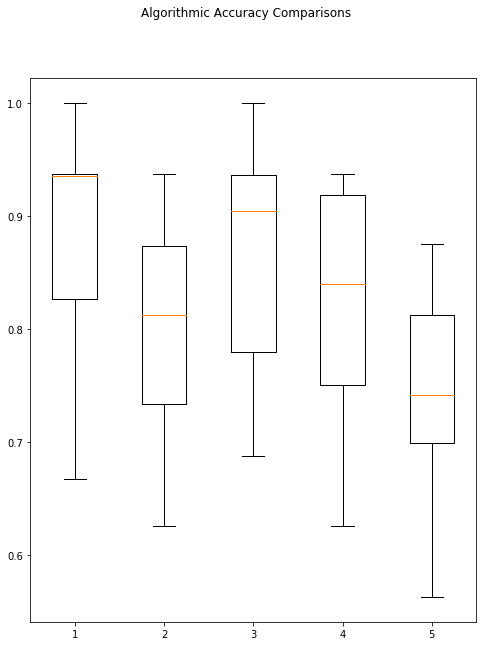

In [37]:
print('Accuracies of Algorithms using Correlation Coefficients')
algorithmImplementation(X_train_corr_coeff, Y_train_corr_coeff, 5)

#### The best 2 algorithms using Correlation Coefficient Feature Selection are:
#### 1. Logistic Regression 
#### 2. Decision Tree Classifier

#### Regularizing Tuning for the two algorithms which have best performances

In [38]:
# Logistic Regression Tunning Algorithm
scaler_corr = StandardScaler().fit(X_train_corr_coeff)
x_rescaled = scaler_corr.transform(X_train_corr_coeff)
values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
parameter_grid = dict(C=values)
corr_coeff_model = LogisticRegression()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=corr_coeff_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result = grid.fit(x_rescaled, Y_train_corr_coeff)
print("Best: %f using %s "%(result.best_score_,result.best_params_))

Best: 0.878333 using {'C': 0.5} 


In [39]:
# Decision Tree Tunning Algorithm
scaler_corr = StandardScaler().fit(X_train_corr_coeff)
x_rescaled = scaler_corr.transform(X_train_corr_coeff)
parameter_grid = dict()
corr_coeff_model = DecisionTreeClassifier()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=corr_coeff_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result =grid.fit(x_rescaled, Y_train_corr_coeff)
print("Best: %f using %s "%(result.best_score_, result.best_params_))

Best: 0.840833 using {} 


### 8.1.2 Algorithm implmentation using Information Gain feature selection

Accuracies of Algorithms using Information Gain
Logistic Regression : 0.878333 (0.096821)
Support Vector Machine : 0.795417 (0.108164)
Decision Tree : 0.872917 (0.087545)
K Nearest Neighbor : 0.821667 (0.100031)
Naive Bayes : 0.722083 (0.125873)


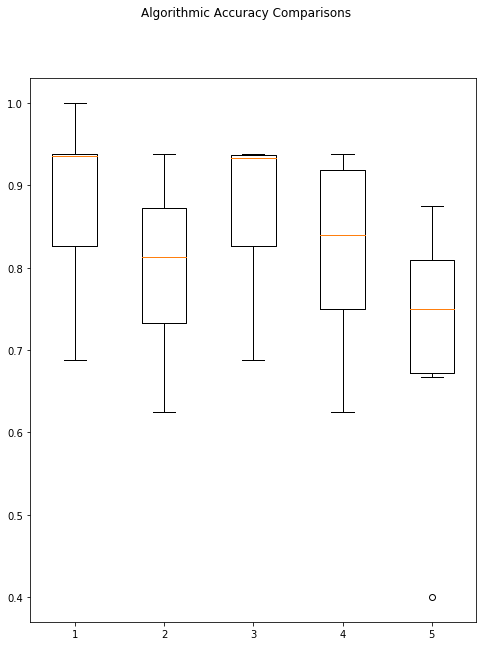

In [40]:
print('Accuracies of Algorithms using Information Gain')
algorithmImplementation(X_train_info_gain, Y_train_info_gain, 5)

#### The best 2 algorithms using Information Gain Feature Selection are:
#### 1. Logistic Regression 
#### 2. Decision Tree Classifier

#### Regularizing Tuning for the two algorithms which have best performances

In [41]:
# Logistic Regression Tunning Algorithm
scaler_info = StandardScaler().fit(X_train_info_gain)
x_rescaled = scaler_info.transform(X_train_info_gain)
values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
parameter_grid = dict(C=values)
info_model = LogisticRegression()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=info_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result = grid.fit(x_rescaled, Y_train_info_gain)
print("Best: %f using %s "%(result.best_score_,result.best_params_))

Best: 0.872083 using {'C': 0.2} 


In [42]:
# Decision Tree Tunning Algorithm
scaler_info = StandardScaler().fit(X_train_info_gain)
x_rescaled = scaler_info.transform(X_train_info_gain)
parameter_grid = dict()
info_model = DecisionTreeClassifier()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=info_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result =grid.fit(x_rescaled, Y_train_info_gain)
print("Best: %f using %s "%(result.best_score_, result.best_params_))

Best: 0.873333 using {} 


### 8.1.3 Algorithm implmentation using Forward feature selection

Accuracies of Algorithms using Forward Feature Selection
Logistic Regression : 0.859583 (0.114429)
Support Vector Machine : 0.821667 (0.098949)
Decision Tree : 0.847500 (0.089252)
K Nearest Neighbor : 0.885833 (0.072510)
Naive Bayes : 0.705000 (0.071439)


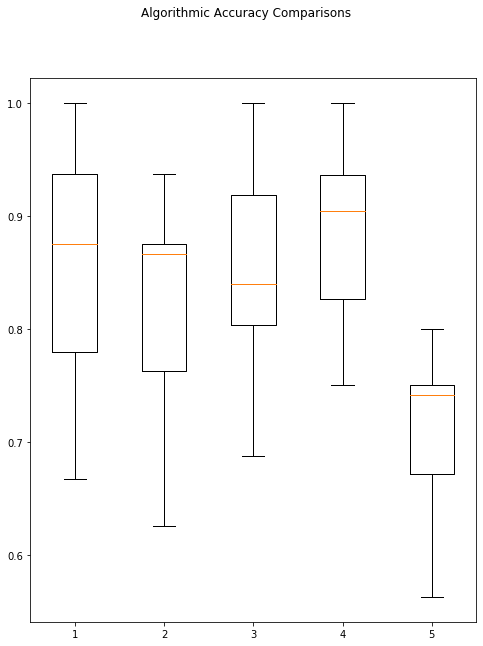

In [43]:
print('Accuracies of Algorithms using Forward Feature Selection')
algorithmImplementation(X_train_forward, Y_train_forward, 5)

#### The best algorithm using Forward Feature Selection is:
#### Logistic Regression

#### Regularizing Tuning for the algorithm having best perfomance

In [44]:
# Logistic Regression Tunning Algorithm
scaler_forward = StandardScaler().fit(X_train_forward)
x_rescaled = scaler_forward.transform(X_train_forward)
values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
parameter_grid = dict(C=values)
forward_model = LogisticRegression()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=forward_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result = grid.fit(x_rescaled, Y_train_forward)
print("Best: %f using %s "%(result.best_score_,result.best_params_))

Best: 0.865417 using {'C': 0.7} 


### 8.1.4 Algorithm implmentation using Backward feature selection

Accuracies of Algorithms using Backward Feature Selection
Logistic Regression : 0.840417 (0.111695)
Support Vector Machine : 0.815417 (0.129315)
Decision Tree : 0.854167 (0.104715)
K Nearest Neighbor : 0.821667 (0.125261)
Naive Bayes : 0.742917 (0.066772)


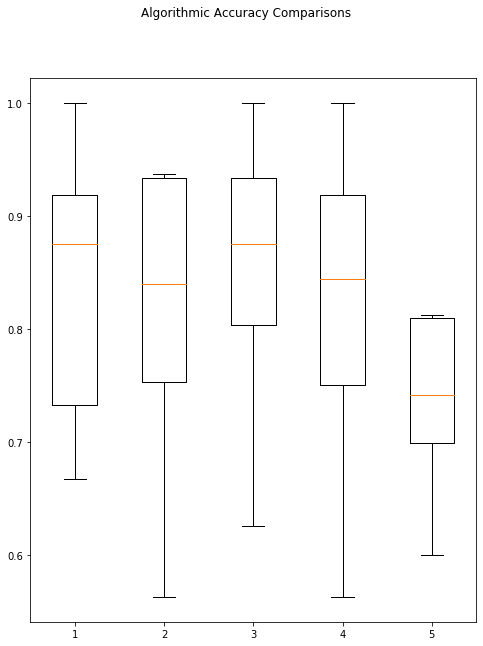

In [45]:
print('Accuracies of Algorithms using Backward Feature Selection')
algorithmImplementation(X_train_backward, Y_train_backward, 5)

#### The best 2 algorithms using Backward Feature Selection are:
#### 1. Logistic Regression 
#### 2. Decision Tree Classifier

#### Regularizing Tuning for the two algorithms which have best performances

In [46]:
# Logistic Regression Tunning Algorithm
scaler_backward = StandardScaler().fit(X_train_backward)
x_rescaled = scaler_backward.transform(X_train_backward)
values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
parameter_grid = dict(C=values)
backward_model = LogisticRegression()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=backward_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result = grid.fit(x_rescaled, Y_train_backward)
print("Best: %f using %s "%(result.best_score_,result.best_params_))

Best: 0.872083 using {'C': 0.4} 


In [47]:
# Decision Tree Tunning Algorithm
scaler_backward = StandardScaler().fit(X_train_backward)
x_rescaled = scaler_backward.transform(X_train_backward)
parameter_grid = dict()
backward_model = DecisionTreeClassifier()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=backward_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result =grid.fit(x_rescaled, Y_train_backward)
print("Best: %f using %s "%(result.best_score_, result.best_params_))

Best: 0.841667 using {} 


### 8.1.5 Algorithm implmentation using Embedded feature selection

Accuracies of Algorithms using Embedded Method
Logistic Regression : 0.865417 (0.106001)
Support Vector Machine : 0.801667 (0.114218)
Decision Tree : 0.821250 (0.105466)
K Nearest Neighbor : 0.827917 (0.101209)
Naive Bayes : 0.845417 (0.101695)


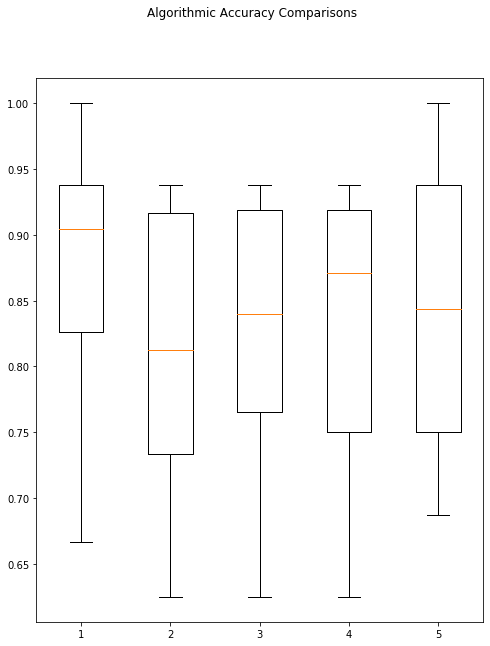

In [48]:
print('Accuracies of Algorithms using Embedded Method')
algorithmImplementation(X_train_lasso, Y_train_lasso, 5)

#### The best algorithm using Embedded Feature Selection is:
#### Logistic Regression

#### Regularizing Tuning for the algorithm which has best performance

In [49]:
# Logistic Regression Tunning Algorithm
scaler_embedded = StandardScaler().fit(X_train_lasso)
x_rescaled = scaler_embedded.transform(X_train_lasso)
values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
parameter_grid = dict(C=values)
embedded_model = LogisticRegression()
fold = KFold(n_splits=10, random_state=5)
grid = GridSearchCV(estimator=embedded_model, param_grid=parameter_grid, scoring='accuracy', cv=fold)
result = grid.fit(x_rescaled, Y_train_lasso)
print("Best: %f using %s "%(result.best_score_,result.best_params_))

Best: 0.879167 using {'C': 0.1} 


#### Visualization of Accuracies of Algorithms

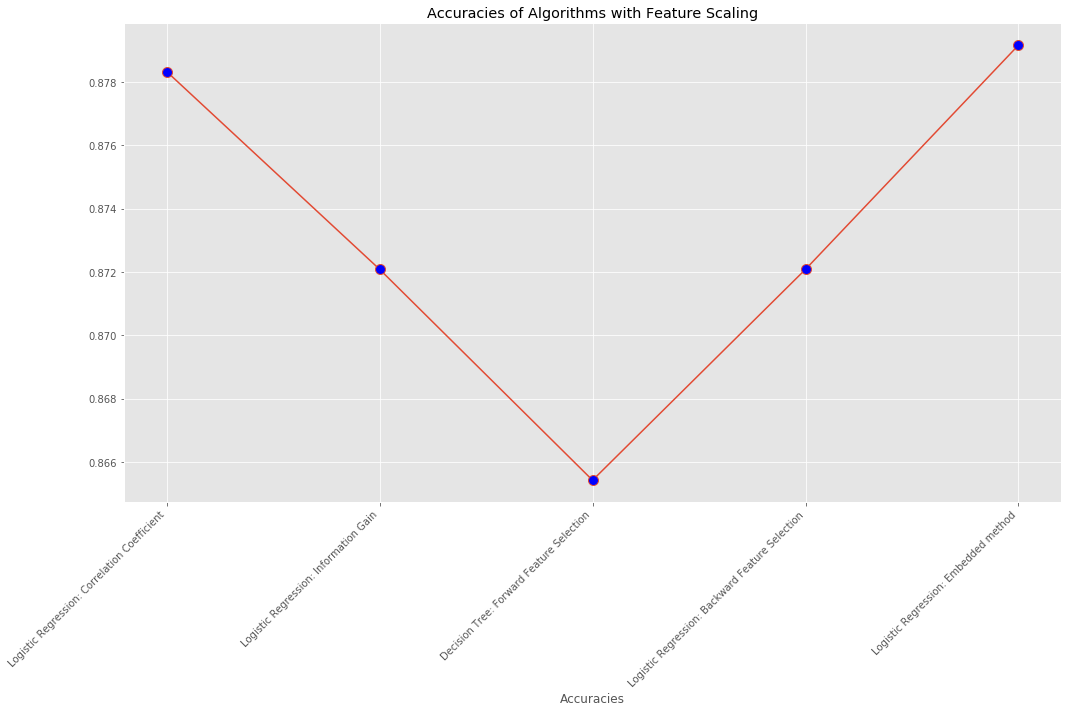

In [81]:
result_models = [0.878333, 0.872083, 0.865417, 0.872083, 0.879167]
names = ['Logistic Regression: Correlation Coefficient','Logistic Regression: Information Gain',
        'Decision Tree: Forward Feature Selection','Logistic Regression: Backward Feature Selection',
         'Logistic Regression: Embedded method']
# Displaying line plot for the confirmed_cases_day_count
figure(figsize=(15, 10), facecolor='w', edgecolor='k')
plt.style.use('ggplot')
plt.plot(names, result_models, marker='o', markerfacecolor='blue', markersize=10)
plt.gcf().autofmt_xdate(rotation=45)
plt.xlabel('Algorithms')
plt.xlabel('Accuracies')
plt.title('Accuracies of Algorithms with Feature Scaling')
plt.tight_layout()
plt.show()

#### Observations: 

#### Accuracies of Algorithms using Correlation Coefficients
#### Logistic Regression : 0.871667 (0.108202)
#### Support Vector Machine : 0.795417 (0.108164)
#### Decision Tree : 0.842083 (0.111779)
#### K Nearest Neighbor : 0.821667 (0.100031)
#### Naive Bayes : 0.750000 (0.091439)

#### Conclusion:
#### Logistic Regression is the best model with 0.878333 accuracy using {'C': 0.5} after performance tunning


#### Accuracies of Algorithms using Information Gain
#### Logistic Regression : 0.878333 (0.096821)
#### Support Vector Machine : 0.795417 (0.108164)
#### Decision Tree : 0.866667 (0.105935)
#### K Nearest Neighbor : 0.821667 (0.100031)
#### Naive Bayes : 0.722083 (0.125873)

#### Conclusion:

#### Logistic Regression is the best model with 0.872083 accuracy using {'C': 0.2} after performance tunning


#### Accuracies of Algorithms using Forward Feature Selection
#### Logistic Regression : 0.859583 (0.114429)
#### Support Vector Machine : 0.821667 (0.098949)
#### Decision Tree : 0.872500 (0.074773)
#### K Nearest Neighbor : 0.865833 (0.072510)
#### Naive Bayes : 0.705000 (0.071439)

#### Conclusion:

#### Decision Tree is the best model with 0.865417 accuracy using {'C': 0.7} after performance tunning

#### Accuracies of Algorithms using Backward Feature Selection
#### Logistic Regression : 0.840417 (0.111695)
#### Support Vector Machine : 0.815417 (0.129315)
#### Decision Tree : 0.841250 (0.142710)
#### K Nearest Neighbor : 0.821667 (0.125261)
#### Naive Bayes : 0.742917 (0.066772)

#### Conclusion:

#### Logistic Regression is the best model with 0. 872083 accuracy using {'C': 0.7} after performance tunning

#### Accuracies of Algorithms using Embedded Method
#### Logistic Regression : 0.865417 (0.106001)
#### Support Vector Machine : 0.801667 (0.114218)
#### Decision Tree : 0.820417 (0.099538)
#### K Nearest Neighbor : 0.827917 (0.101209)
#### Naive Bayes : 0.845417 (0.101695)

#### Conclusion:

#### Logistic Regression is the best model with 0. 879167 accuracy using {'C': 0.1} after performance tunning

### 8.2 Implementation of various algorithms with Feature Scaling
### Ensemble and Boosting Classification Algorithms

In [50]:
# Algorithm implmentation with feature scaling using Ensemble and Boosting classification algorithms
def algorithmImplementationFeatureScaling(X_train, Y_train, n_neighbors):
    ens = []
    ens.append(('scaledAB',Pipeline([('scale',StandardScaler()),('AB',AdaBoostClassifier())])))
    ens.append(('scaledGBC',Pipeline([('scale',StandardScaler()),('GBc',GradientBoostingClassifier())])))
    ens.append(('scaledRFC',Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(n_estimators=10))])))
    ens.append(('scaledETC',Pipeline([('scale',StandardScaler()),('ETC',ExtraTreesClassifier(n_estimators=10))])))
    # Evaluation of Ensemble Techiniques
    outcome = []
    columns = []
    for column,parkinson_model in ens:
        fold = KFold(n_splits=10,random_state=5)
        result = cross_val_score(parkinson_model, X_train, Y_train, cv=fold, scoring='accuracy')
        outcome.append(result)
        columns.append(column)
        message = "%s : %f (%f)"%(column,result.mean(),result.std())
        print(message)
    
    # Visualization of Ensemble Techniques
    fig=plt.figure()
    fig.suptitle('Comparison of Algorithms using Ensemble')
    plt.boxplot(outcome)
    plt.show()

### 8.2.1 Algorithm implmentation using Correlation Coefficient feature selection

Accuracies of Algorithms using Correlation Coefficients
scaledAB : 0.852917 (0.086604)
scaledGBC : 0.885417 (0.104404)
scaledRFC : 0.878750 (0.082189)
scaledETC : 0.917500 (0.068435)


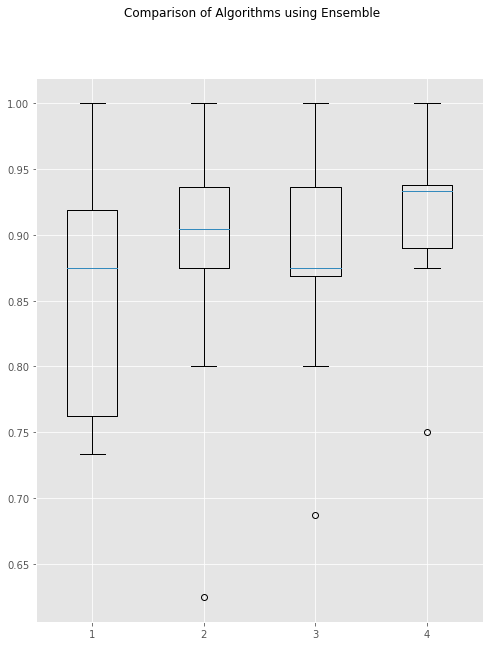

In [110]:
print('Accuracies of Algorithms using Correlation Coefficients')
algorithmImplementationFeatureScaling(X_train_corr_coeff, Y_train_corr_coeff, 5)

#### The best algorithm using Correlation Coefficient Feature Selection is:
#### Gradient Boosting
#### Extra Trees Classifier
#### Regularizing Tuning for the algorithm which has best performance

In [52]:
# Gradient Boosting Classifier Tuning
scaler_coeff = StandardScaler().fit(X_train_corr_coeff)
x_rescaled = scaler_coeff.transform(X_train_corr_coeff)
n_estimators = [10,20,30,40,50,100,150,200,250,300]
learning_rate = [0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
coeff_model = GradientBoostingClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=coeff_model, param_grid=param_grid, scoring='accuracy', cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_corr_coeff)

print("Best: %f using %s "%(grid_result.best_score_, grid_result.best_params_))

Best: 0.910833 using {'learning_rate': 0.1, 'n_estimators': 20} 


In [53]:
# Extra Trees Classifier Tuning
scaler_coeff = StandardScaler().fit(X_train_corr_coeff)
x_rescaled = scaler_coeff.transform(X_train_corr_coeff)
n_estimators = [10,20,30,40,50,100,150,200]
param_grid = dict(n_estimators=n_estimators)
coeff_model = ExtraTreesClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=coeff_model,param_grid=param_grid,scoring='accuracy',cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_corr_coeff)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.936667 using {'n_estimators': 40} 


### 8.2.2 Algorithm implmentation using Information Gain feature selection

Accuracies of Algorithms using Information Gain
scaledAB : 0.853750 (0.101113)
scaledGBC : 0.911667 (0.089050)
scaledRFC : 0.877917 (0.075071)
scaledETC : 0.897500 (0.059401)


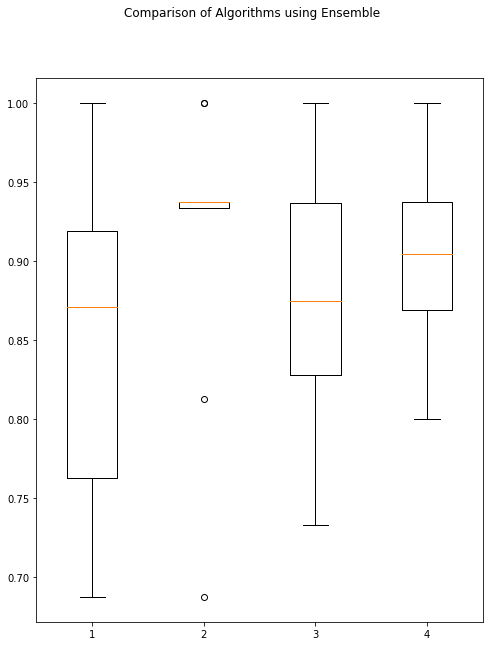

In [54]:
print('Accuracies of Algorithms using Information Gain')
algorithmImplementationFeatureScaling(X_train_info_gain, Y_train_info_gain, 5)

#### The best algorithm using Information Gain Feature Selection is:
#### Gradient Boosting
#### Extra Trees Classifier
#### Regularizing Tuning for the algorithm which has best performance

In [55]:
# Gradient Boosting Classifier Tuning
scaler_info = StandardScaler().fit(X_train_info_gain)
x_rescaled = scaler_info.transform(X_train_info_gain)
n_estimators = [10,20,30,40,50,100,150,200,250,300]
learning_rate = [0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
info_model = GradientBoostingClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=info_model, param_grid=param_grid, scoring='accuracy', cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_info_gain)

print("Best: %f using %s "%(grid_result.best_score_, grid_result.best_params_))

Best: 0.930417 using {'learning_rate': 0.7, 'n_estimators': 20} 


In [56]:
# Extra Trees Classifier Tuning
scaler_info = StandardScaler().fit(X_train_info_gain)
x_rescaled = scaler_info.transform(X_train_info_gain)
n_estimators = [10,20,30,40,50,100,150,200]
param_grid = dict(n_estimators=n_estimators)
info_model = ExtraTreesClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=info_model,param_grid=param_grid,scoring='accuracy',cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_info_gain)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.917083 using {'n_estimators': 50} 


### 8.2.3 Algorithm implmentation using Forward feature selection

Accuracies of Algorithms using Forward Feature Selection
scaledAB : 0.840417 (0.085778)
scaledGBC : 0.892083 (0.062540)
scaledRFC : 0.891250 (0.077065)
scaledETC : 0.885833 (0.072510)


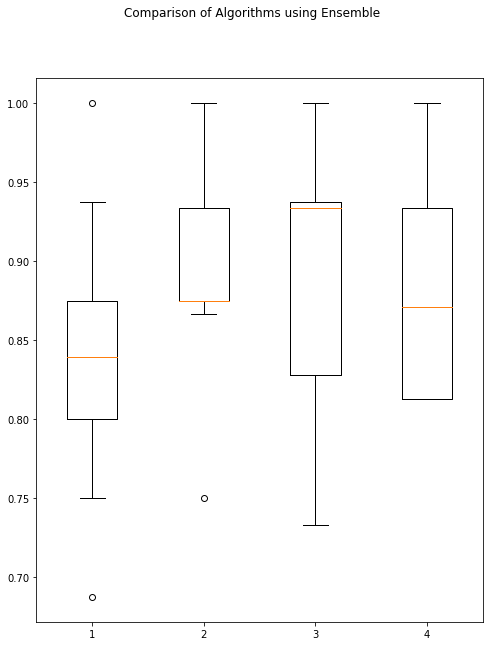

In [57]:
print('Accuracies of Algorithms using Forward Feature Selection')
algorithmImplementationFeatureScaling(X_train_forward, Y_train_forward, 5)

#### The best algorithm using Forward Feature Selection is:
#### Gradient Boosting
#### Extra Trees Classifier
#### Regularizing Tuning for the algorithm which has best performance

In [58]:
# Gradient Boosting Classifier Tuning
scaler_forward = StandardScaler().fit(X_train_forward)
x_rescaled = scaler_forward.transform(X_train_forward)
n_estimators = [10,20,30,40,50,100,150,200,250,300]
learning_rate = [0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
forward_model = GradientBoostingClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=forward_model, param_grid=param_grid, scoring='accuracy', cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_forward)

print("Best: %f using %s "%(grid_result.best_score_, grid_result.best_params_))

Best: 0.923750 using {'learning_rate': 1.0, 'n_estimators': 100} 


In [59]:
# Extra Trees Classifier Tuning
scaler_forward = StandardScaler().fit(X_train_forward)
x_rescaled = scaler_forward.transform(X_train_forward)
n_estimators = [10,20,30,40,50,100,150,200]
param_grid = dict(n_estimators=n_estimators)
forward_model = ExtraTreesClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=forward_model,param_grid=param_grid,scoring='accuracy',cv=fold)
grid_result = grid.fit(x_rescaled,Y_train_forward)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.917500 using {'n_estimators': 20} 


### 8.2.4 Algorithm implmentation using Backward feature selection

Accuracies of Algorithms using Backward Feature Selection
scaledAB : 0.834583 (0.083895)
scaledGBC : 0.891250 (0.063668)
scaledRFC : 0.872917 (0.074402)
scaledETC : 0.897917 (0.051682)


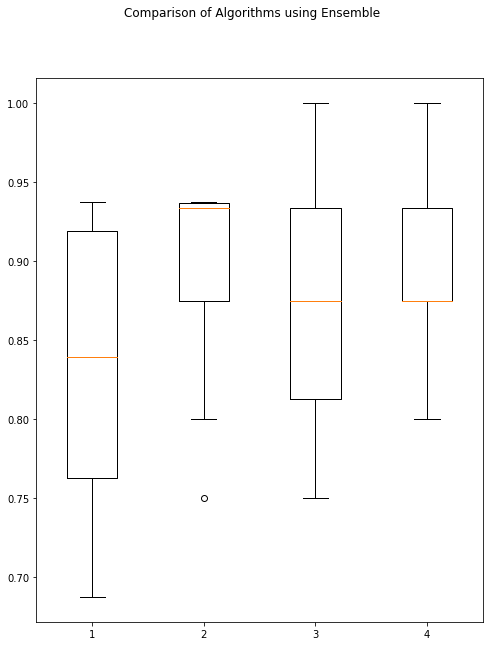

In [60]:
print('Accuracies of Algorithms using Backward Feature Selection')
algorithmImplementationFeatureScaling(X_train_backward, Y_train_backward, 5)

#### The best algorithm using Backward Feature Selection is:
#### Gradient Boosting
#### Extra Trees Classifier
#### Regularizing Tuning for the algorithm which has best performance

In [61]:
# Gradient Boosting Classifier Tuning
scaler_backward = StandardScaler().fit(X_train_backward)
x_rescaled = scaler_backward.transform(X_train_backward)
n_estimators = [10,20,30,40,50,100,150,200,250,300]
learning_rate = [0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
backward_model = GradientBoostingClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=backward_model, param_grid=param_grid, scoring='accuracy', cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_backward)

print("Best: %f using %s "%(grid_result.best_score_, grid_result.best_params_))

Best: 0.891667 using {'learning_rate': 0.1, 'n_estimators': 200} 


In [62]:
# Extra Trees Classifier Classifier Tuning
scaler_backward = StandardScaler().fit(X_train_backward)
x_rescaled = scaler_backward.transform(X_train_backward)
n_estimators = [10,20,30,40,50,100,150,200]
param_grid = dict(n_estimators=n_estimators)
backward_model = ExtraTreesClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=backward_model,param_grid=param_grid,scoring='accuracy',cv=fold)
grid_result = grid.fit(x_rescaled,Y_train_backward)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.917083 using {'n_estimators': 40} 


### 8.2.5 Algorithm implmentation using Embedded feature selection

Accuracies of Algorithms using Embedded Method
scaledAB : 0.859167 (0.090154)
scaledGBC : 0.872500 (0.084578)
scaledRFC : 0.884583 (0.070687)
scaledETC : 0.904167 (0.075852)


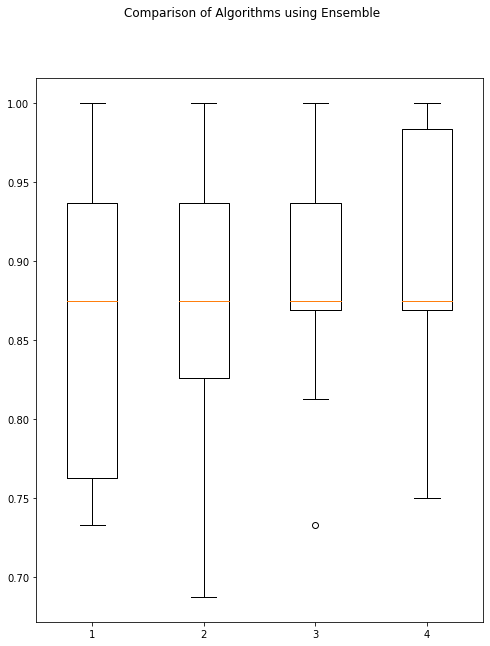

In [63]:
print('Accuracies of Algorithms using Embedded Method')
algorithmImplementationFeatureScaling(X_train_lasso, Y_train_lasso, 5)

#### The best algorithm using Embedded Feature Selection is:
#### Gradient Boosting
#### Extra Trees Classifier
#### Regularizing Tuning for the algorithm which has best performance

In [64]:
# Gradient Boosting Classifier Tuning
scaler_embedded = StandardScaler().fit(X_train_lasso)
x_rescaled = scaler_embedded.transform(X_train_lasso)
n_estimators = [10,20,30,40,50,100,150,200,250,300]
learning_rate = [0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
embedded_model = GradientBoostingClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=embedded_model, param_grid=param_grid, scoring='accuracy', cv=fold)
grid_result = grid.fit(x_rescaled, Y_train_lasso)

print("Best: %f using %s "%(grid_result.best_score_, grid_result.best_params_))

Best: 0.904583 using {'learning_rate': 0.01, 'n_estimators': 150} 


In [65]:
# Extra Trees Classifier Classifier Tuning
scaler_embedded = StandardScaler().fit(X_train_lasso)
x_rescaled = scaler_embedded.transform(X_train_lasso)
n_estimators = [10,20,30,40,50,100,150,200]
param_grid = dict(n_estimators=n_estimators)
embedded_model = ExtraTreesClassifier()
fold = KFold(n_splits=10,random_state=5)
grid = GridSearchCV(estimator=embedded_model,param_grid=param_grid,scoring='accuracy',cv=fold)
grid_result = grid.fit(x_rescaled,Y_train_lasso)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.905000 using {'n_estimators': 30} 


#### Visualization of Accuracies of Algorithms

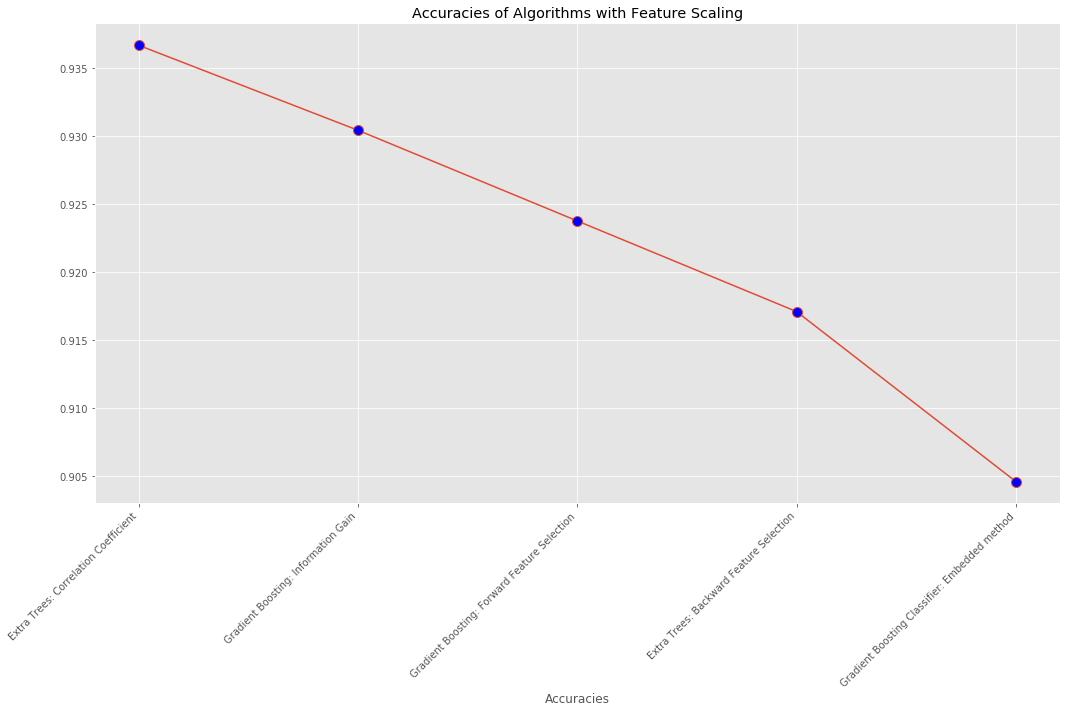

In [80]:
result_models = [0.936667,0.930417, 0.923750, 0.917083, 0.904583]
names = ['Extra Trees: Correlation Coefficient','Gradient Boosting: Information Gain',
        'Gradient Boosting: Forward Feature Selection','Extra Trees: Backward Feature Selection',
         'Gradient Boosting Classifier: Embedded method']
# Displaying line plot for the confirmed_cases_day_count
figure(figsize=(15, 10), facecolor='w', edgecolor='k')
plt.style.use('ggplot')
plt.plot(names, result_models, marker='o', markerfacecolor='blue', markersize=10)
plt.gcf().autofmt_xdate(rotation=45)
plt.xlabel('Algorithms')
plt.xlabel('Accuracies')
plt.title('Accuracies of Algorithms with Feature Scaling')
plt.tight_layout()
plt.show()

#### Observations: 

#### Accuracies of Algorithms using Correlation Coefficients
#### scaledAB : 0.852917 (0.086604)
#### scaledGBC : 0.885417 (0.104404)
#### scaledRFC : 0.891250 (0.057205)
#### scaledETC : 0.929583 (0.083113)

#### Conclusion:

#### Extra Trees Classifier Tuning is the best model with 0.936667 accuracy using {'n_estimators': 50} after performance tunning

#### Accuracies of Algorithms using Information Gain
#### scaledAB : 0.853750 (0.101113)
#### scaledGBC : 0.905000 (0.084570)
#### scaledRFC : 0.891667 (0.074466)
#### scaledETC : 0.917083 (0.049317)

#### Conclusion:

#### Gradient Boosting Classifier Tuning is the best model 0.930417 using {'learning_rate': 0.7, 'n_estimators': 10} after performance tunning

#### Accuracies of Algorithms using Forward Feature Selection
#### scaledAB : 0.840417 (0.085778)
#### scaledGBC : 0.898333 (0.063634)
#### scaledRFC : 0.865833 (0.083412)
#### scaledETC : 0.904583 (0.050465)


#### Conclusion:

#### Gradient Boosting Classifier Tuning is the best model 0.923750 using {'learning_rate': 1.0, 'n_estimators': 40} after performance tunning


#### Accuracies of Algorithms using Backward Feature Selection
#### scaledAB : 0.834583 (0.083895)
#### scaledGBC : 0.904167 (0.059307)
#### scaledRFC : 0.865417 (0.054710)
#### scaledETC : 0.892083 (0.073985)

#### Conclusion:

#### Extra Trees Classifier Tuning is the best model with 0.917083 using {'n_estimators': 30} after performance tunning


#### Accuracies of Algorithms using Embedded Method
#### scaledAB : 0.859167 (0.090154)
#### scaledGBC : 0.872500 (0.084578)
#### scaledRFC : 0.878333 (0.083848)
#### scaledETC : 0.878750 (0.086812)

#### Conclusion:

#### Gradient Boosting Classifier Tuning is the best 0.904583 using {'learning_rate': 0.01, 'n_estimators': 150} after performance tunning

## 9. Compare the tunned algorithms and selecting the best algorithm

#### We will now compare all 4 algortihms and then check which one is the best :

#### Logistic Regression is the best model with 0. 879167 accuracy using {'C': 0.1} 

#### Decision Tree is the best model with 0.865417 accuracy using {'C': 0.7} 

#### Extra Trees Classifier Tuning is the best model with 0.936667 accuracy using {'n_estimators': 50} 

#### Gradient Boosting Classifier Tuning is the best model 0.930417 using {'learning_rate': 0.7, 'n_estimators': 10} 

#### As the Extra Trees Classifier has the best performance we will use this algorithm to predict the Parkinson's disease

## 10. Fit and predict the best algorithm

In [83]:
# Fit the Extra Trees Classifier model using Correlation Coefficcient feature selection
scaler_algo_coeff = StandardScaler().fit(X_train_corr_coeff)
x_scaler_coeff = scaler_algo_coeff.transform(X_train_corr_coeff)
coeff_model = ExtraTreesClassifier(n_estimators=30)
coeff_model.fit(x_scaler_coeff, Y_train_corr_coeff)

# Validation Testset using Correlation Coefficcient feature selection
scaled_test_coeff = scaler_algo_coeff.transform(X_test_corr_coeff)
y_pred_coeff = coeff_model.predict(scaled_test_coeff)
y_predtrain_coeff = coeff_model.predict(x_scaler_coeff)

In [84]:
# Fit the Extra Trees Classifier model using Information Gain feature selection
scaler_algo_info = StandardScaler().fit(X_train_info_gain)
x_scaler_info = scaler_algo_info.transform(X_train_info_gain)
info_model = ExtraTreesClassifier(n_estimators=30)
info_model.fit(x_scaler_info, Y_train_info_gain)

# Validation Testset using Information Gain feature selection
scaled_test_info = scaler_algo_info.transform(X_test_info_gain)
y_pred_info = info_model.predict(scaled_test_info)
y_predtrain_info = info_model.predict(x_scaler_info)

In [85]:
# Fit the Extra Trees Classifier model using Forward feature selection
scaler_algo_forward = StandardScaler().fit(X_train_forward)
x_scaler_forward = scaler_algo_forward.transform(X_train_forward)
forward_model = ExtraTreesClassifier(n_estimators=30)
forward_model.fit(x_scaler_forward, Y_train_forward)

# Validation Testset using Forward feature selection
scaled_test_forward = scaler_algo_forward.transform(X_test_forward)
y_pred_forward = forward_model.predict(scaled_test_forward)
y_predtrain_forward = forward_model.predict(x_scaler_forward)

In [86]:
# Fit the Extra Trees Classifier model using Backward feature selection
scaler_algo_backward = StandardScaler().fit(X_train_backward)
x_scaler_backward = scaler_algo_backward.transform(X_train_backward)
backward_model = ExtraTreesClassifier(n_estimators=30)
backward_model.fit(x_scaler_backward, Y_train_backward)

# Validation Testset using Backward feature selection
scaled_test_backward = scaler_algo_backward.transform(X_test_backward)
y_pred_backward = backward_model.predict(scaled_test_backward)
y_predtrain_backward = backward_model.predict(x_scaler_backward)

In [102]:
# Fit the Extra Trees Classifier model using Embedded feature selection
scaler_algo_embedded = StandardScaler().fit(X_train_lasso)
x_scaler_embedded = scaler_algo_embedded.transform(X_train_lasso)
embedded_model = ExtraTreesClassifier(n_estimators=30)
embedded_model.fit(x_scaler_embedded, Y_train_lasso)

# Validation Testset using Embedded feature selection
scaler_test_embedded = scaler_algo_embedded.transform(X_train_lasso)
y_pred_embedded = embedded_model.predict(scaler_test_embedded)
y_predtrain_embedded = embedded_model.predict(x_scaler_embedded)

## 11. Accuracy of Algorithm

In [95]:
# Correlation Coefficient Feature Selection
accuracy_mean_coeff = accuracy_score(Y_train_corr_coeff,y_predtrain_coeff)
accuracy_matrix_coeff = confusion_matrix(Y_train_corr_coeff,y_predtrain_coeff)
print("Train set",accuracy_mean_coeff)
print("Train set matrix",accuracy_matrix_coeff)

accuracy_mean_coeff = accuracy_score(Y_test_corr_coeff,y_pred_coeff)
accuracy_matrix_coeff = confusion_matrix(Y_test_corr_coeff,y_pred_coeff)
print("Test set",accuracy_mean_coeff)
print("Test set matrix",accuracy_matrix_coeff)

Train set 1.0
Train set matrix [[ 38   0]
 [  0 118]]
Test set 0.9230769230769231
Test set matrix [[ 7  3]
 [ 0 29]]


In [97]:
# Information Gain Feature Selection
accuracy_mean_info = accuracy_score(Y_train_info_gain,y_predtrain_info)
accuracy_matrix_info = confusion_matrix(Y_train_info_gain,y_predtrain_info)
print("Train set",accuracy_mean_info)
print("Train set matrix",accuracy_matrix_info)

accuracy_mean_info = accuracy_score(Y_test_info_gain,y_pred_info)
accuracy_matrix_info = confusion_matrix(Y_test_info_gain,y_pred_info)
print("Test set",accuracy_mean_info)
print("Test set matrix",accuracy_matrix_info)

Train set 1.0
Train set matrix [[ 38   0]
 [  0 118]]
Test set 0.8974358974358975
Test set matrix [[ 7  3]
 [ 1 28]]


In [98]:
# Forward Feature Selection
accuracy_mean_forward = accuracy_score(Y_train_forward,y_predtrain_forward)
accuracy_matrix_forward = confusion_matrix(Y_train_forward,y_predtrain_forward)
print("Train set",accuracy_mean_forward)
print("Train set matrix",accuracy_matrix_forward)

accuracy_mean_forward = accuracy_score(Y_test_forward,y_pred_forward)
accuracy_matrix_forward = confusion_matrix(Y_test_forward,y_pred_forward)
print("Test set",accuracy_mean_forward)
print("Test set matrix",accuracy_matrix_forward)

Train set 1.0
Train set matrix [[ 38   0]
 [  0 118]]
Test set 0.8974358974358975
Test set matrix [[ 8  2]
 [ 2 27]]


In [100]:
# Backward Feature Selection
accuracy_mean_backward = accuracy_score(Y_train_backward,y_predtrain_backward)
accuracy_matrix_backward = confusion_matrix(Y_train_backward,y_predtrain_backward)
print("Train set",accuracy_mean_backward)
print("Train set matrix",accuracy_matrix_backward)

accuracy_mean_backward = accuracy_score(Y_test_backward,y_pred_backward)
accuracy_matrix_backward = confusion_matrix(Y_test_backward,y_pred_backward)
print("Test set",accuracy_mean_backward)
print("Test set matrix",accuracy_matrix_backward)

Train set 1.0
Train set matrix [[ 38   0]
 [  0 118]]
Test set 0.9487179487179487
Test set matrix [[ 9  1]
 [ 1 28]]


In [108]:
# Embedded Feature Selection
accuracy_mean_embedded = accuracy_score(Y_train_lasso,y_predtrain_embedded)
accuracy_matrix_embedded = confusion_matrix(Y_train_lasso,y_predtrain_embedded)
print("Train set",accuracy_mean_embedded)
print("Train set matrix",accuracy_matrix_embedded)

accuracy_mean_embedded = accuracy_score(Y_test_backward,y_pred_backward)
accuracy_matrix_embedded = confusion_matrix(Y_test_backward,y_pred_backward)
print("Test set",accuracy_mean_embedded)
print("Test set matrix",accuracy_matrix_embedded)

Train set 1.0
Train set matrix [[ 38   0]
 [  0 118]]
Test set 0.9487179487179487
Test set matrix [[ 9  1]
 [ 1 28]]


# 12. Conclusion

#### We have received following accuracies for each feature selection method for training and testing sets:
#### 1. Correlation Coefficient Feature Selection
#### Training Set Accuracy: 100 % Testing Set Accuarcay: 92.31 %
#### 2. Information Gain Feature Selection
#### Training Set Accuracy: 100 % Testing Set Accuarcay: 89.74 %
#### 3. Foward Feature Selection
#### Training Set Accuracy: 100 % Testing Set Accuarcay: 89.74 %
#### 4. Backward Feature Selection
#### Training Set Accuracy: 100 % Testing Set Accuarcay: 94.87 %
#### 5. Embedded Fearure Selection 
#### Training Set Accuracy: 100% Testing Set Accuarcay: 94.87%

#### As per our results, the model did not overfit or underfit
#### As per the analysis, using all these 5 feature selection methods, Backward Feature Selection/ Elimination method provided 
#### highest accuracy for testing set.
#### All the feature selection methods provided 100% accuracy for training set.